<a href="https://colab.research.google.com/github/ElgunBabayev1/Machine-Learning/blob/main/Insurance_Charges_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from pickle import dump

In [ ]:
# ==========================================
# Part 1: Data Loading and Overview
# ==========================================
# Load the dataset
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Display data structure and summary
print("Data Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Summary Statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    3

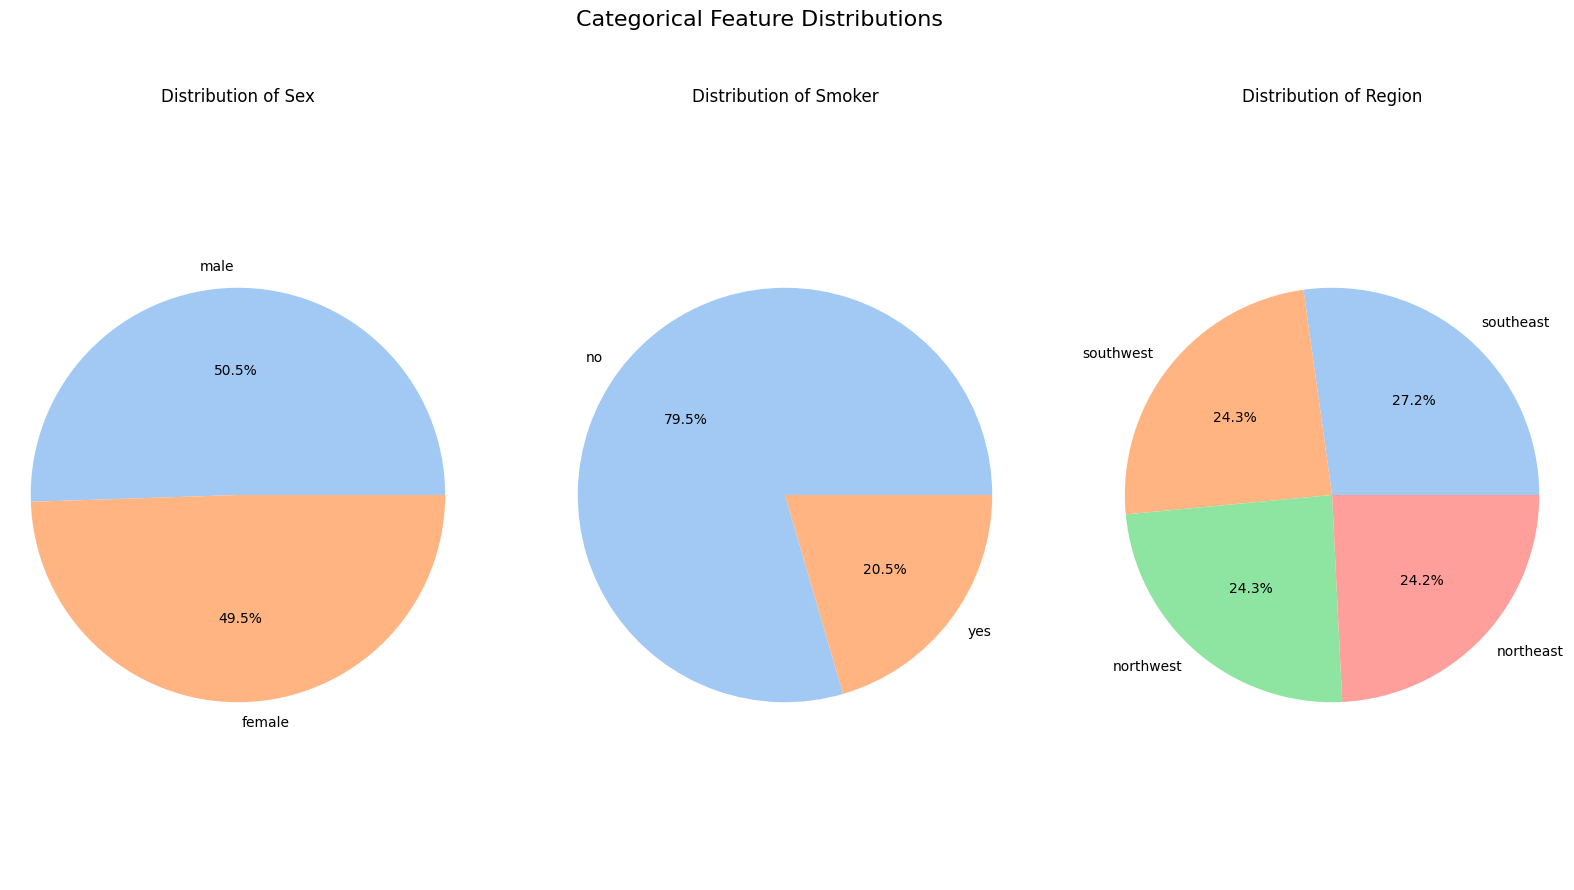

In [ ]:
# ==========================================
# Part 2: Exploratory Data Analysis (EDA)
# ==========================================
# Distribution of Categorical Features
features = ['sex', 'smoker', 'region']
plt.subplots(figsize=(20, 10))
plt.axis('off')
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
    x = df[col].value_counts()
    plt.pie(x.values, labels=x.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    plt.title(f"Distribution of {col.capitalize()}")
    plt.axis('equal')
plt.suptitle("Categorical Feature Distributions", fontsize=16)
plt.show()

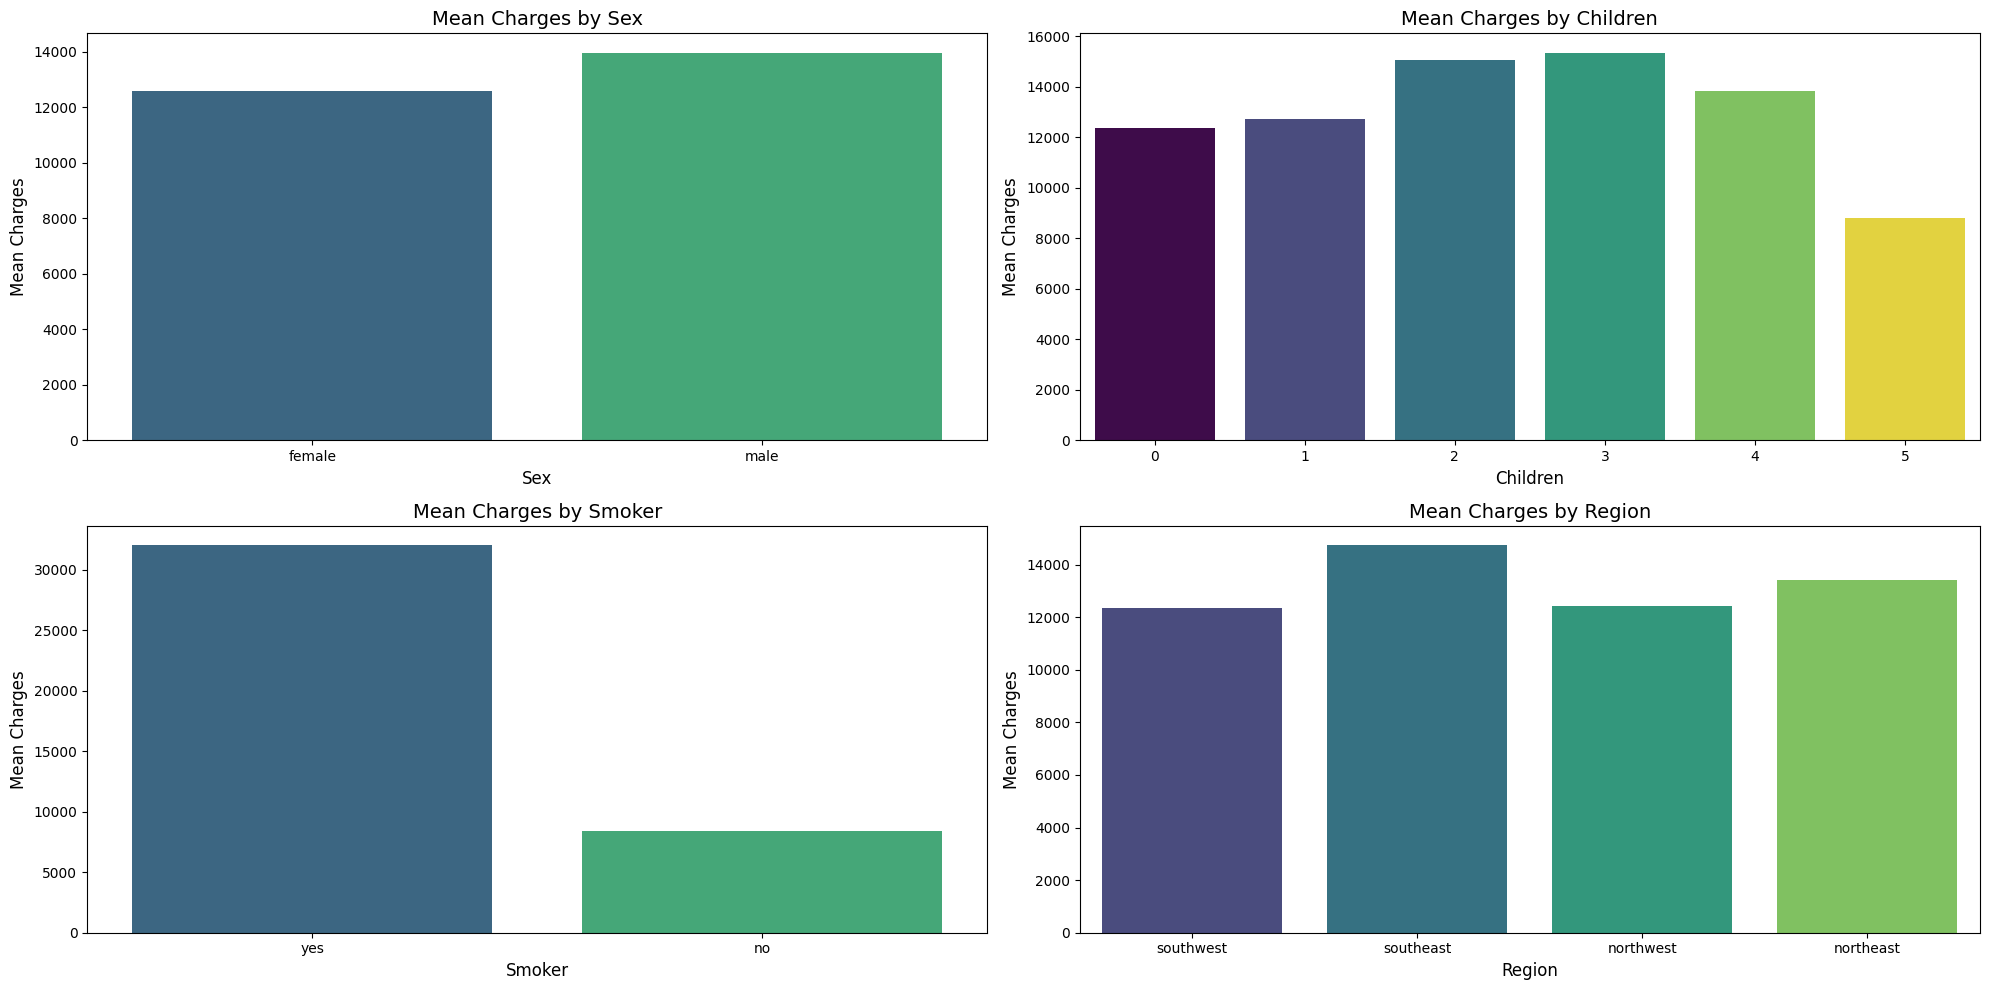

In [ ]:
# ==========================================
# Analysis of Charges by Groups
# ==========================================
features = ['sex', 'children', 'smoker', 'region']
plt.subplots(figsize=(20, 10))
plt.axis('off')
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x=col, y='charges', data=df, errorbar=None, hue=col, palette='viridis', dodge=False, legend = False)
    plt.title(f'Mean Charges by {col.capitalize()}', fontsize=14)
    plt.xlabel(col.capitalize(), fontsize=12)
    plt.ylabel('Mean Charges', fontsize=12)
plt.tight_layout()
plt.show()

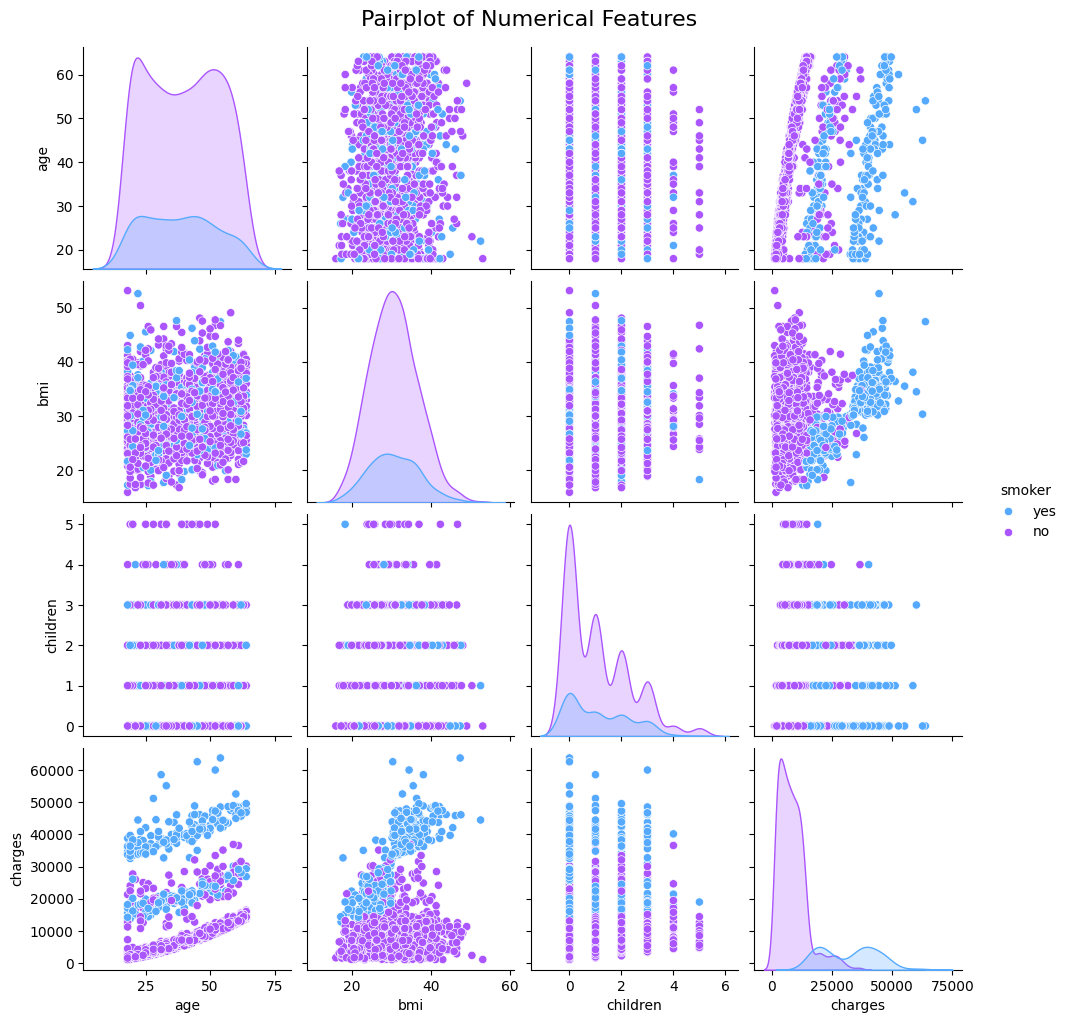

In [ ]:
# ==========================================
# Pairplot for Numerical Features
# ==========================================
pairplot = sns.pairplot(df, hue='smoker', diag_kind='kde', palette='cool')
pairplot.fig.suptitle("Pairplot of Numerical Features", fontsize=16, y=1.02)  # Move title slightly above
plt.show()

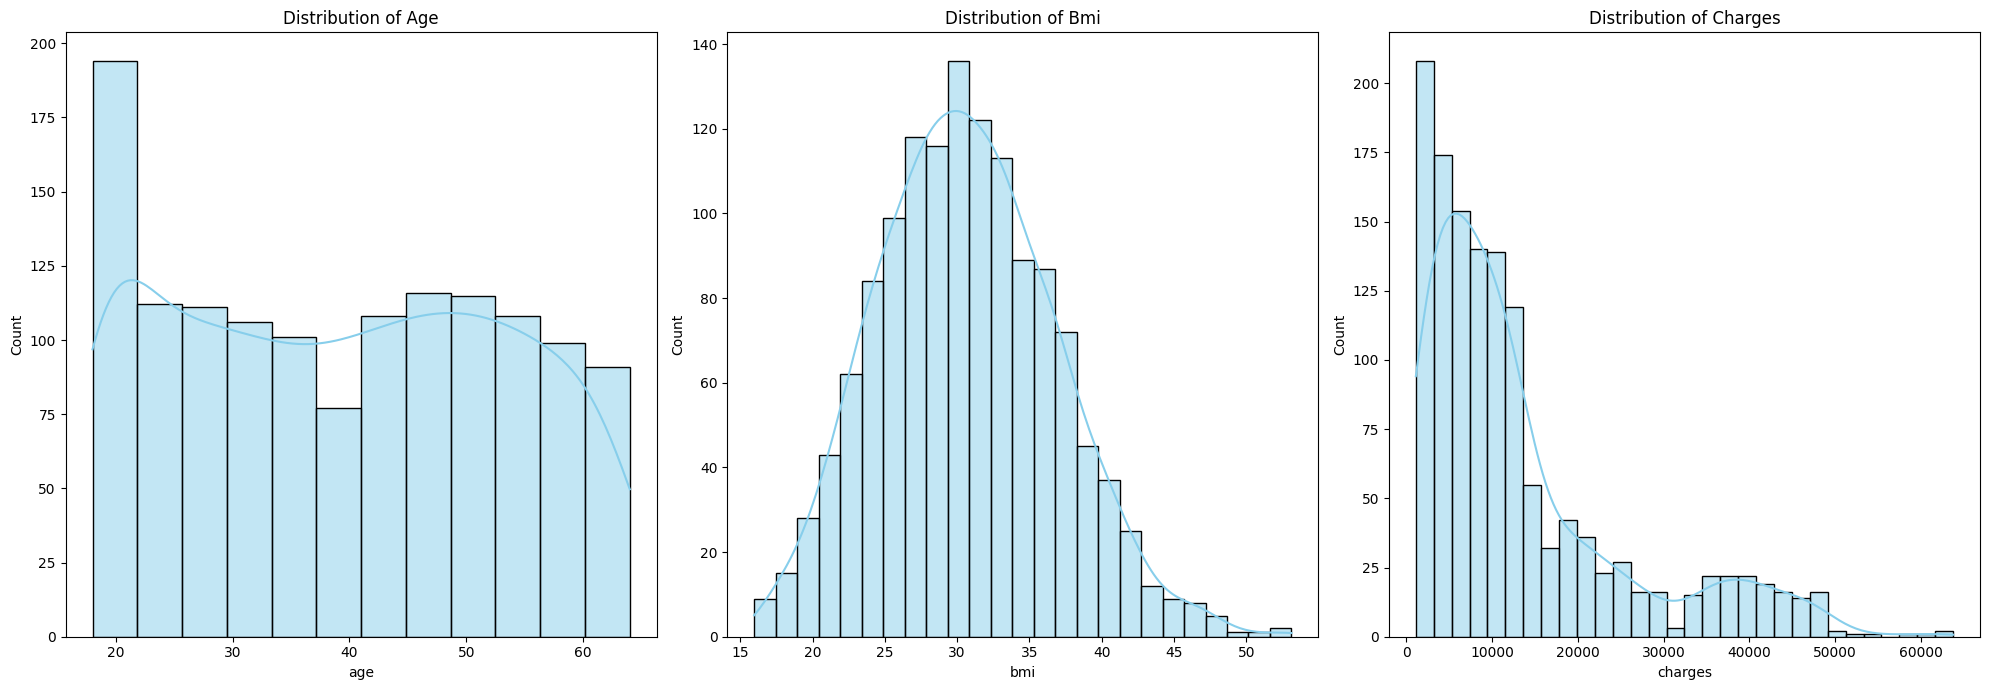

In [ ]:
# Distribution of Numerical Features
numerical_features = ['age', 'bmi', 'charges']
plt.subplots(figsize=(20, 7))
plt.axis('off')
for i, col in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col.capitalize()}")
plt.tight_layout()
plt.show()

In [ ]:
# Encoding Categorical Variables
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['region'] = df['region'].map({'northwest': 0, 'northeast': 1, 'southeast': 2, 'southwest': 3})

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'region'}>],
       [<Axes: title={'center': 'charges'}>,
        <Axes: title={'center': 'bmi_age'}>, <Axes: >]], dtype=object)

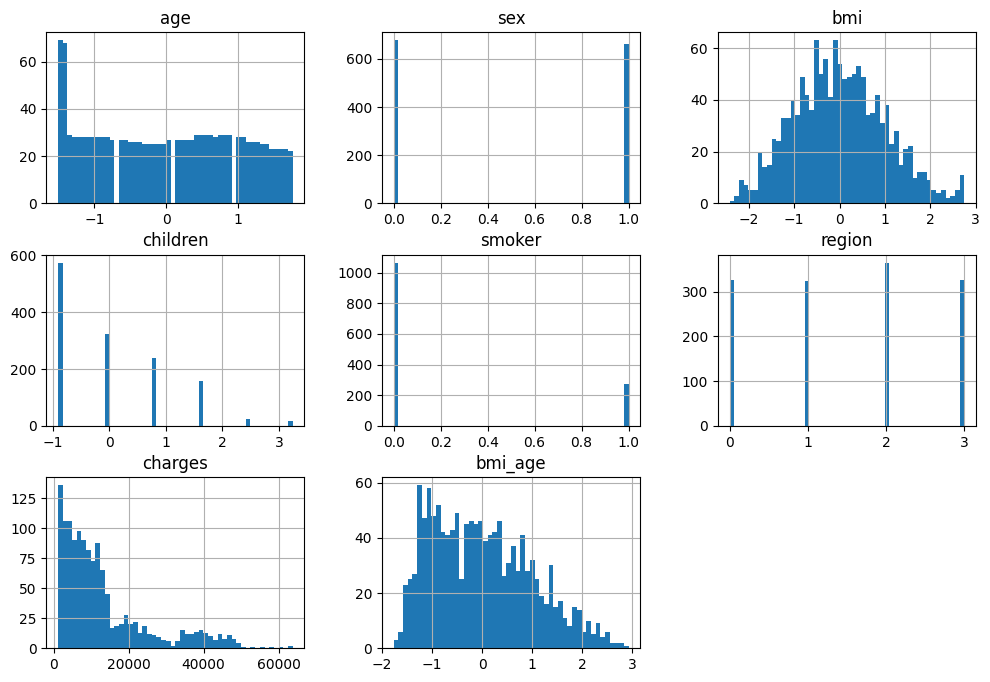

In [ ]:
df.hist(bins = 50, figsize = (12, 8))

In [ ]:
df.corr()['charges'].sort_values(ascending = False) * 100

,charges
charges,100.000000
smoker,78.725143
age,29.900819
bmi,19.834097
children,6.799823
region,1.174085
sex,-5.729206


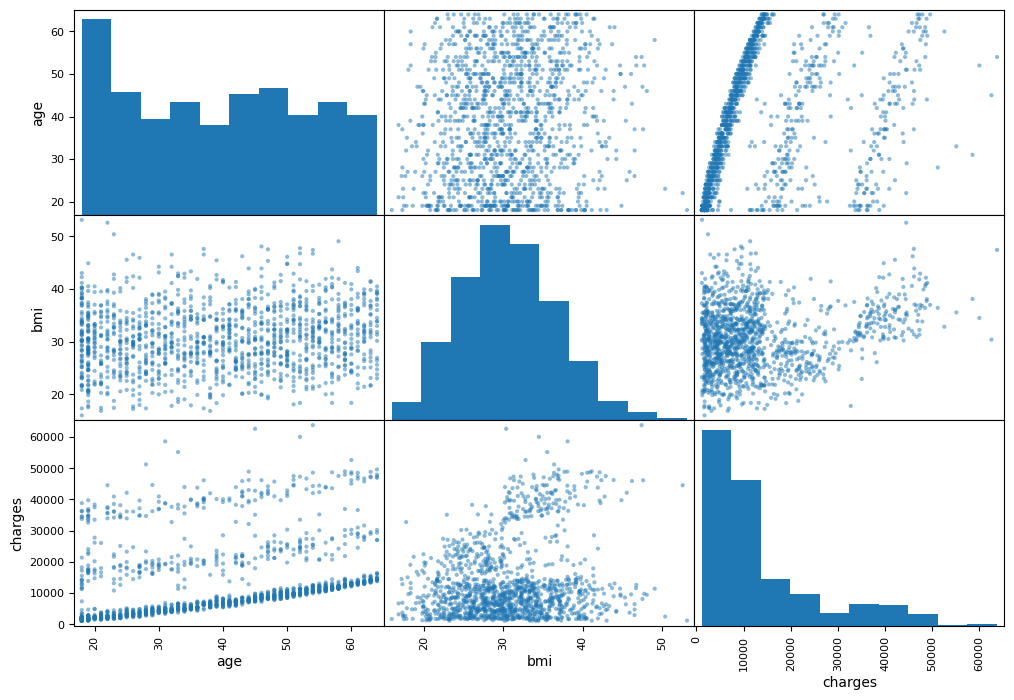

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['age', 'bmi', 'charges']
scatter_matrix(df[attributes], figsize = (12, 8));

<ipython-input-13-12253a2a1c2e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df['bmi'], palette='Set3')


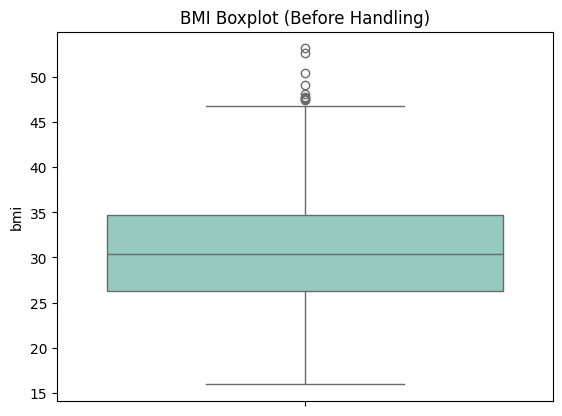

In [ ]:
# ==========================================
# Part 3: Outlier Detection and Handling
# ==========================================
# BMI Outlier Detection
sns.boxplot(df['bmi'], palette='Set3')
plt.title("BMI Boxplot (Before Handling)")
plt.show()

In [ ]:
# Define Outlier Bounds
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print(f"BMI Outlier Limits: {low_lim}, {up_lim}")

BMI Outlier Limits: 13.7, 47.290000000000006


<ipython-input-15-a5290b41959f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df['bmi'], palette='Set3')


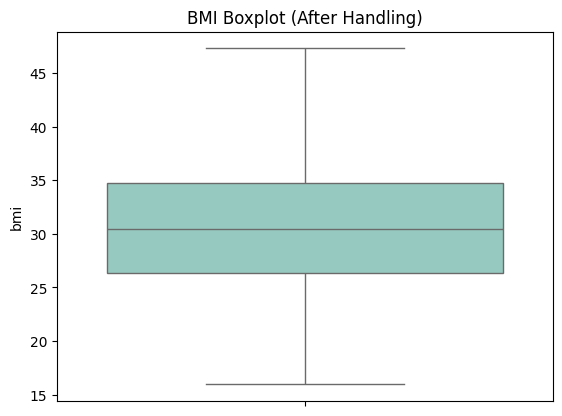

In [ ]:
# Handle Outliers
df['bmi'] = np.clip(df['bmi'], low_lim, up_lim)
sns.boxplot(df['bmi'], palette='Set3')
plt.title("BMI Boxplot (After Handling)")
plt.show()

<ipython-input-16-3c1baab26e71>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df['age'], palette='Set3')


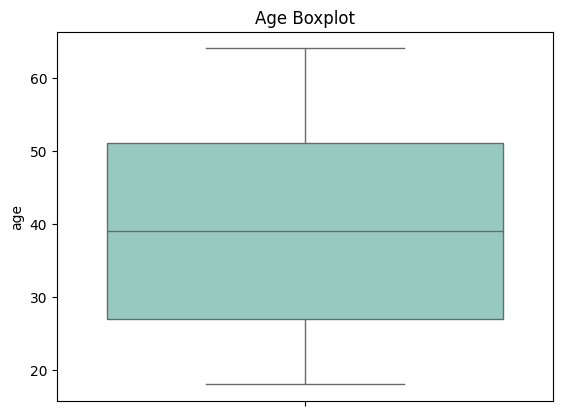

In [ ]:
sns.boxplot(df['age'], palette='Set3')
plt.title("Age Boxplot")
plt.show()

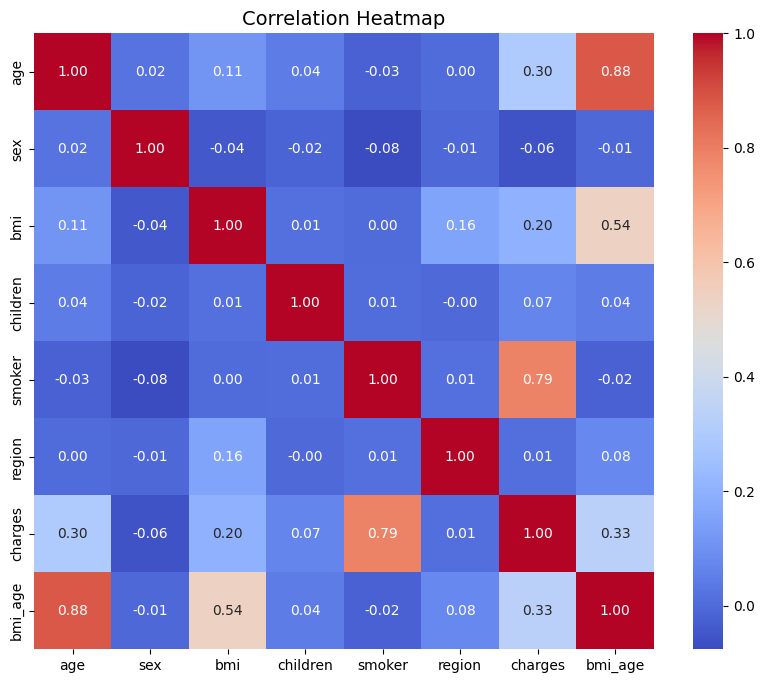

In [ ]:
# ==========================================
# Part 4: Feature Engineering
# ==========================================
# Adding Polynomial Features
df['bmi_age'] = df['bmi'] * df['age']
# Scaling Features
scaler = StandardScaler()
scaled_features = ['age', 'bmi', 'children', 'bmi_age']
df[scaled_features] = scaler.fit_transform(df[scaled_features])

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [ ]:
# ==========================================
# Part 5: Model Preparation and Evaluation
# ==========================================
# Splitting Data into Training and Testing Sets
X = df.drop(['charges'], axis=1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model Evaluation Function
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    cv_score = cross_val_score(model, x_train, y_train, cv=5).mean()
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Train Score: {train_score:.4f}")
    print(f"Test Score: {test_score:.4f}")
    print(f"Cross-Validation Score: {cv_score:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    return model

In [ ]:
# Linear Regression
print("\nLinear Regression Results:")
lr_model = LinearRegression()
evaluate_model(lr_model, x_train, y_train, x_test, y_test)


Linear Regression Results:
Train Score: 0.7419
Test Score: 0.7805
Cross-Validation Score: 0.7340
RMSE: 5836.9711
MAE: 4221.4216


LinearRegression()

In [ ]:
# Random Forest with RandomizedSearchCV
print("\nRandom Forest Results:")

# Define the parameter grid for Random Forest
param_dist = {
    'n_estimators': [50, 100, 200, 300],               # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40],               # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                   # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],                     # Minimum samples required at each leaf node
    'bootstrap': [True, False]                         # Whether bootstrap samples are used
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,                  # Number of parameter settings sampled
    scoring='r2',  # Evaluation metric
    cv=5,                       # Number of cross-validation folds
    verbose=2,
    random_state=42,
    n_jobs=-1                   # Use all processors
)

rf_model = evaluate_model(rf_random, x_train, y_train, x_test, y_test)
rf_best = rf_model.best_params_
print("Best Random Forest Params:", rf_best)


Random Forest Results:
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Train Score: 0.9194
Test Score: 0.8743
Cross-Validation Score: 0.8404
RMSE: 4417.5398
MAE: 2459.0382
Best Random Forest Params: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': True}


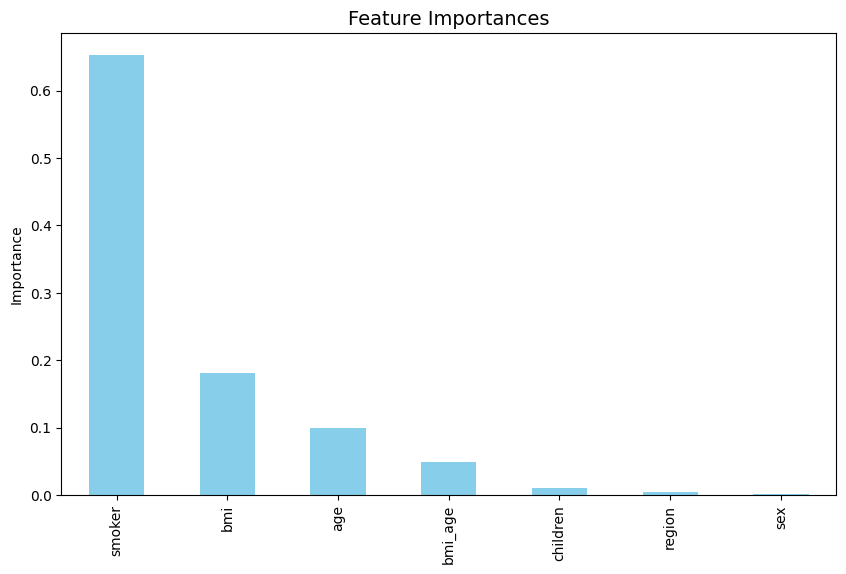

In [ ]:
# Feature Importance
rf_final = rf_model.best_estimator_
feature_importances = pd.DataFrame(rf_final.feature_importances_, index=X.columns, columns=['Importance'])
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
feature_importances['Importance'].plot.bar(color='skyblue')
plt.title("Feature Importances", fontsize=14)
plt.ylabel("Importance")
plt.show()

In [ ]:
# Gradient Boosting with GridSearchCV
print("\nGradient Boosting Results:")

# Parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of trees
    'max_depth': [10, 20, None],              # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],            # Minimum samples required at each leaf node
    'bootstrap': [True, False]                # Whether bootstrap samples are used
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='r2',         # Use R² as the scoring metric
    cv=5,                 # Number of cross-validation folds
    verbose=2,            # Verbosity level
    n_jobs=-1             # Use all available processors
)

rf_model = evaluate_model(rf_grid, x_train, y_train, x_test, y_test)
rf_best = rf_model.best_params_
print("Best Gradient Boosting Params:", rf_best)


Gradient Boosting Results:
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Train Score: 0.9110
Test Score: 0.8771
Cross-Validation Score: 0.8424
RMSE: 4368.3428
MAE: 2455.0000
Best Gradient Boosting Params: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
# Gradient Boosting with RandomizedSearchCV
print("\nGradient Boosting Results:")
gb_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
gb_random = RandomizedSearchCV(GradientBoostingRegressor(), gb_params, n_iter=10, cv=5, scoring='r2', random_state=42)
gb_model = evaluate_model(gb_random, x_train, y_train, x_test, y_test)
gb_best = gb_model.best_params_
print("Best Gradient Boosting Params:", gb_best)


Gradient Boosting Results:
Train Score: 0.8858
Test Score: 0.8810
Cross-Validation Score: 0.8490
RMSE: 4299.0448
MAE: 2489.5517
Best Gradient Boosting Params: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}


In [ ]:
# ==========================================
# Part 6: Predictions on New Data
# ==========================================
# Sample Data Prediction
new_data = pd.DataFrame({'age': [19], 'sex': [0], 'bmi': [27.9], 'children': [0], 'smoker': [1], 'region': [1], 'bmi_age': [19*27.9]})
new_data[scaled_features] = scaler.transform(new_data[scaled_features])
final_model = rf_model
prediction = final_model.predict(new_data)
print("\nPrediction for New Data:", prediction[0])


Prediction for New Data: 17328.17300583925


In [ ]:
print(f'Prediction: {final_model.predict(x_test.iloc[[267]])[0]:.2f}')
print(f'Real value: {y_test.iloc[267]:.2f}')

Prediction: 10281.17
Real value: 9872.70


In [ ]:
print(f'Prediction: {final_model.predict(x_test.iloc[[1]])[0]:.2f}')
print(f'Real value: {y_test.iloc[1]:.2f}')

Prediction: 5475.27
Real value: 5272.18
